In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,TimeSeriesSplit
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostRegressor
import numpy as np
import datetime as dt
import cbpro
import matplotlib.pyplot as plt 
import time
from web3.middleware import geth_poa_middleware
from web3.gas_strategies.time_based import medium_gas_price_strategy
from eth_account.messages import encode_defunct

from web3 import Web3, constants
from web3 import middleware
# from flask import Flask, flash, request, redirect, url_for, render_template
# from werkzeug.utils import secure_filename
import json

infura_url = "https://mainnet.infura.io/v3/5c9cb0b35a2742659dec6fc7680c16c4"
web3 = Web3(Web3.HTTPProvider(infura_url))
web3.middleware_onion.inject(geth_poa_middleware, layer=0)

# address = '0x1A0F33bBc5c7bA83f490cdB6C13ee50e1C851908'
# abi = '[{"inputs":[{"internalType":"string","name":"_name","type":"string"},{"internalType":"string","name":"_symbol","type":"string"},{"internalType":"string","name":"_initBaseURI","type":"string"},{"internalType":"string","name":"_initNotRevealedUri","type":"string"}],"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"","type":"address"},{"indexed":false,"internalType":"uint256","name":"","type":"uint256"}],"name":"AddressCalled","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address[]","name":"","type":"address[]"}],"name":"AddressesAdded","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"owner","type":"address"},{"indexed":true,"internalType":"address","name":"approved","type":"address"},{"indexed":true,"internalType":"uint256","name":"tokenId","type":"uint256"}],"name":"Approval","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"owner","type":"address"},{"indexed":true,"internalType":"address","name":"operator","type":"address"},{"indexed":false,"internalType":"bool","name":"approved","type":"bool"}],"name":"ApprovalForAll","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"previousOwner","type":"address"},{"indexed":true,"internalType":"address","name":"newOwner","type":"address"}],"name":"OwnershipTransferred","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"from","type":"address"},{"indexed":true,"internalType":"address","name":"to","type":"address"},{"indexed":true,"internalType":"uint256","name":"tokenId","type":"uint256"}],"name":"Transfer","type":"event"},{"inputs":[],"name":"PRICE","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"_mintSingleNFT1","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"","type":"address"}],"name":"addressMintedBalance","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"tokenId","type":"uint256"}],"name":"approve","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"owner","type":"address"}],"name":"balanceOf","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"baseExtension","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"baseURI","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"_count","type":"uint256"}],"name":"claimTauros","outputs":[],"stateMutability":"payable","type":"function"},{"inputs":[{"internalType":"uint256","name":"tokenId","type":"uint256"}],"name":"getApproved","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"getCurrentToken","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"owner","type":"address"},{"internalType":"address","name":"operator","type":"address"}],"name":"isApprovedForAll","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"maxMintAmount","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"maxSupply","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"name","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"notRevealedUri","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"owner","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"tokenId","type":"uint256"}],"name":"ownerOf","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"bool","name":"_state","type":"bool"}],"name":"pause","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"paused","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"renounceOwnership","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"reserveNFTs","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"reveal","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"revealed","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"from","type":"address"},{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"tokenId","type":"uint256"}],"name":"safeTransferFrom","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"from","type":"address"},{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"tokenId","type":"uint256"},{"internalType":"bytes","name":"data","type":"bytes"}],"name":"safeTransferFrom","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"operator","type":"address"},{"internalType":"bool","name":"approved","type":"bool"}],"name":"setApprovalForAll","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"string","name":"_newBaseExtension","type":"string"}],"name":"setBaseExtension","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"string","name":"_newBaseURI","type":"string"}],"name":"setBaseURI","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"string","name":"_notRevealedURI","type":"string"}],"name":"setNotRevealedURI","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"uint256","name":"_newPRICE","type":"uint256"}],"name":"setPRICE","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"uint256","name":"_newmaxMintAmount","type":"uint256"}],"name":"setmaxMintAmount","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"bytes4","name":"interfaceId","type":"bytes4"}],"name":"supportsInterface","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"symbol","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"index","type":"uint256"}],"name":"tokenByIndex","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"","type":"uint256"}],"name":"tokenId","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"owner","type":"address"},{"internalType":"uint256","name":"index","type":"uint256"}],"name":"tokenOfOwnerByIndex","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"_Id","type":"uint256"}],"name":"tokenURI","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"totalSupply","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"from","type":"address"},{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"tokenId","type":"uint256"}],"name":"transferFrom","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"newOwner","type":"address"}],"name":"transferOwnership","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_owner","type":"address"}],"name":"walletOfOwner","outputs":[{"internalType":"uint256[]","name":"","type":"uint256[]"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"withdraw","outputs":[],"stateMutability":"payable","type":"function"}]'
# abi = json.loads(abi)
# mint_acct ='Enter Address'


# web3.eth.mint_acct = mint_acct
# mint_key = 'Enter Private Key'
# nonce =  web3.eth.getTransactionCount(mint_acct)
# contract = web3.eth.contract(address=address, abi=abi)


# withdraw = contract.functions.withdraw().buildTransaction({'chainId': 1,'gas':250000,'gasPrice': web3.toWei('32.875000015', 'gwei'), 'nonce': nonce})
# signed_tx2 = web3.eth.account.signTransaction(withdraw, mint_key)
# latestBlock()
# tx_hash = web3.eth.sendRawTransaction(signed_tx2.rawTransaction)
# print("withdrawing")
# tx_hash2 = web3.toHex(tx_hash)	
# print(tx_hash2)
# web3.eth.waitForTransactionReceipt(tx_hash2)

## Transfer to CB-pro Address AS ETH to allow the machine learning model to trade.. will integrate LSTM as staking contract accumulates liquidity overtime , more liquidity ?

# result = web3.eth.getBalance(mint_acct) 
# result = web3.fromWei(result,'ether')
# print(result)

# cb_address = 'ENTER CB-PRO _ ETHEREUM ADDRESS FOR AI TRADING'


# tx = {
#     'nonce': nonce,
#     'to': cb_address,
#     'value': web3.toWei(.5, 'ether'),
#     'gas': 250000,
#     'gasPrice': web3.toWei('50', 'gwei')
# }

##sign the transaction
# signed_tx = web3.eth.account.sign_transaction(tx, mint_key)

# #send transaction
# tx_hash = web3.eth.sendRawTransaction(signed_tx.rawTransaction)



apiKey = "###"
apiSecret = "###"
passphrase = "###"

auth_client = cbpro.AuthenticatedClient(apiKey,apiSecret,passphrase)
auth_client_df = pd.DataFrame(auth_client.get_accounts()) 
auth_client_df.to_csv('Current_info.csv')
current_info = pd.read_csv('Current_info.csv') 
current_info = current_info.drop(['Unnamed: 0'],axis=1)
# pie = current_info['available'][[8,12,16,18,20,22,24,26]] 
# plt.pie(pie)
# plt.legend([current_info['currency'][8],current_info['currency'][12],current_info['currency'][16],
#             current_info['currency'][18],current_info['currency'][20],
#             current_info['currency'][22], #current_info['currency'][23]
#             current_info['currency'][24],current_info['currency'][26]]) 

# plt.show()
# plt.close()
b = current_info['currency']
b.to_csv('CURRENCIES.csv')




In [2]:
def current_price(currency):
    currency = currency
    Period = 3600   
    historicData = auth_client.get_product_historic_rates(currency, granularity=Period)
    #     print(historicData)
            # Make an array of the historic price data from the matrix
    price = np.squeeze(np.asarray(np.matrix(historicData)[:,4]))
            # Wait for 1 second, to avoid API limit
    time.sleep(1)
            # Get latest data and show to the user for reference
    newData = auth_client.get_product_ticker(product_id=currency)
    currentPrice=newData['price']
    print('currency: {}'.format(currency))
    print('current_price {} \n\n'.format(currentPrice))
    return currentPrice

def history(currency):
    currency = currency
    Period = 300        
    historicData = auth_client.get_product_historic_rates(currency, granularity=Period)
    historicData = pd.DataFrame(historicData,columns=['time','open','high','low','close','volume'])
    price = historicData['high']
            # Wait for 1 second, to avoid API limit
    time.sleep(1)
    return historicData
def profit_target(token,current_holdings,target_percentage): 
    token = token
    print('\n\n {} target'.format(token))
    current_holdings = current_holdings
    target_percentage = current_holdings * .3 
    total_target = current_holdings+target_percentage
    print('{} profit target {}, == {}'.format(token,target_percentage,total_target))
    return target_percentage 
def loss(token,current_holdings,loss):
    token = token
    print('\n\n {} loss'.format(token))
    current_holdings = current_holdings
    target_percentage = current_holdings * .1 
    total_loss = current_holdings-target_percentage
    print('{} stop loss {}, == {}'.format(token,target_percentage,total_loss)) 
    return target_percentage 

# current_priceBTC = current_price('btc-usd')
# current_priceXTZ = current_price('xtz-usd') 
current_priceETH = current_price('eth-usd') 

# auth_client_eth = current_info['available'][76]  
# print('available {}: {}\n\n'.format(current_info['currency'][16],auth_client_btc))

# auth_client_eth = current_info['available'][76]  
# print('available {}: {}\n\n'.format(current_info['currency'][24],auth_client_xtz))

auth_client_eth = current_info['available'][76]  
print('available {}: {}\n\n'.format(current_info['currency'][76],auth_client_eth)) 

# current_btc = float(current_priceBTC) * float(auth_client_btc) 
# print('current btc balance: {}\n\n'.format(current_btc))
# current_xtz = float(current_priceXTZ) * float(auth_client_xtz)
# print('current xtz balance: {}\n\n'.format(current_xtz))
current_eth = float(current_priceETH) * float(auth_client_eth)
print('current ETH balance: {}\n\n'.format(current_eth))

print('-->PROFIT TARGETS:')
eth_tar = profit_target('eth',current_eth, .3) 
print('\n\n -->MAX LOSS:')
eth_loss = loss('eth',current_eth, .1)

currency: eth-usd
current_price 1617.36 


available ETH: 0.0


current ETH balance: 0.0


-->PROFIT TARGETS:


 eth target
eth profit target 0.0, == 0.0


 -->MAX LOSS:


 eth loss
eth stop loss 0.0, == 0.0


In [ ]:
def latestBlock():
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    a = web3.eth.getBlock('latest')
    time.sleep(3)
    return a

Analyzing and predicting cryptocurrency. 




(300, 6)
TimeSeriesSplit(max_train_size=None, n_splits=5)
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] TEST: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] TEST: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10 

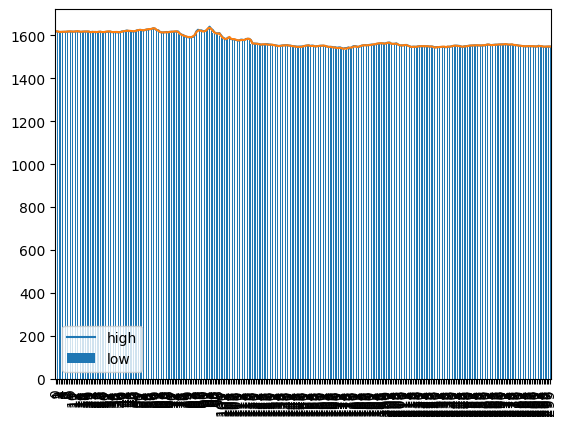

current eth balance 0.0
current eth price [[0.         0.20568885 0.13488613 0.12673431 0.066698  ]]
predicted high ETH portfolio balance [0.]
predicted high ETH [1548.14870327]


,time,open,high,low,close,volume
295,1674623700,1545.35,1547.13,1546.20,1547.04,462.611568
296,1674623400,1545.50,1547.32,1547.11,1546.29,538.662525
297,1674623100,1546.71,1547.95,1547.81,1547.11,316.983996
298,1674622800,1545.70,1547.91,1546.56,1547.81,664.363706
299,1674622500,1546.03,1547.87,1547.39,1546.57,756.910701


In [14]:
def pred_eth():
    iteration=1
    print('Analyzing and predicting cryptocurrency. \n\n\n\n')
    while True:
        
        data = history('eth-usd')
        data.to_csv('eth_high.csv')
#         print(data.shape)
#         data.head()
#         data.describe()
#         data.corr()
#         data[['low']].plot.bar()
        high = data[['high']]
#         plt.plot(high)
#         plt.legend(['high','low']) 
#         plt.savefig('images/high_low.png')
        y = data['high']
        y1=y
        X = data.drop(['high'],axis=1) 
        mini = MinMaxScaler() 
        X = mini.fit_transform(X) 

        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.6) 
        reg = LinearRegression(normalize=True,n_jobs=-1)
        reg.fit(X_train,y_train)
        tscv = TimeSeriesSplit(n_splits=5)
#         print(tscv)  
        TimeSeriesSplit(max_train_size=None, n_splits=4)
        for train_index, test_index in tscv.split(X):
            print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
    #     from sklearn.externals import joblib
    #     joblib.dump(reg, 'models/tscv_1.pkl')
        bata =  data
#         bata.shape
        date = bata['time'] 
#         print(bata.tail())
#         print(X.shape)
        future_x = X 
        X = X[-1:] 
        bata = bata
        date = bata['time'] 
        date = date.tail()
        bata = bata.tail() 
        date = bata['time']
        y = reg.predict(future_x) 
        print('accuracy {}'.format(reg.score(X_test,y_test)))
        y_df = pd.DataFrame(y) 
        y_df.to_csv('pred.csv')
#         y
#         plt.plot(y) 
#         plt.show()
#         plt.savefig('images/PREDICTED_HIGH.png')    
#         plt.close()
        print('current eth balance {}'.format(current_eth))
        print('predicted high ETH portfolio balance',y[-1:]*auth_client_eth)

        order_book = auth_client.get_product_order_book('ETH-USD')
        print(order_book)
        print('\n\n\n\n predicted high ETH',y[-1:])
#         latestBlock()
        
#         if float(y[-1:]) < float(X) and float(y[-1:])==float(X):
#             print('buying eth')
#             auth_client.place_market_order(product_id='ETH-USD', 
#                                                side='buy', 
#                                                funds='50')      
#             time.sleep(10)
#             latestBlock()   

#         if float(y[-1:]) > float(X) and float(y[-1:])==float(X):
#             print('selling eth')
#             auth_client.place_market_order(product_id='ETH-USD',side='sell',size='.2')
#             time.sleep(10)
            
#         if float(y[-1:]) == float(X):
#             print('holding')
            
            
#     fills1 = pd.DataFrame(auth_client.get_fills(product_id="ETH-USD")) 

    time.sleep(10)
    iteration += 1     
    return bata[-1:]
pred_eth()

Analyzing and predicting cryptocurrency. 




(300, 6)
TimeSeriesSplit(max_train_size=None, n_splits=5)
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] TEST: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] TEST: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10 

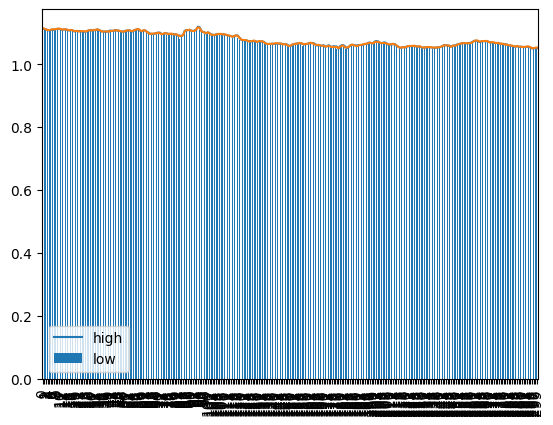

predicted high xtz [1.0524197]
accuracy 0.9890588361086639


,time,open,high,low,close,volume
295,1674624000,1.050,1.053,1.050,1.053,38607.88
296,1674623700,1.047,1.050,1.048,1.050,6037.16
297,1674623400,1.048,1.050,1.050,1.048,1760.89
298,1674623100,1.049,1.051,1.050,1.051,7222.43
299,1674622800,1.047,1.051,1.050,1.050,27641.08


In [24]:
def latestBlock():
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    a = web3.eth.getBlock('latest')
    time.sleep(3)
    return a

def pred_xtz():
    iteration=1
    print('Analyzing and predicting cryptocurrency. \n\n\n\n')
    data = history('xtz-usd')
    print(data.shape)
    data.head()
    data.describe()
    data.corr()
    data[['low']].plot.bar()
    high = data[['high']]
    plt.plot(high)
    plt.legend(['high','low']) 
    plt.savefig('images/high_low.png')
    y = data['high']
    X = data.drop(['high'],axis=1) 
    mini = MinMaxScaler() 
    X = mini.fit_transform(X) 
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.6) 
    reg = LinearRegression(normalize=True,n_jobs=-1)
    reg.fit(X_train,y_train)
    tscv = TimeSeriesSplit(n_splits=5)
    print(tscv)  
    TimeSeriesSplit(max_train_size=None, n_splits=4)
    for train_index, test_index in tscv.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
#     from sklearn.externals import joblib
#     joblib.dump(reg, 'models/tscv_1.pkl')
    bata =  data
    bata.shape
    date = bata['time'] 
    print(bata.tail())
    print(X.shape)
    future_x = X 
    X = X[-1:] 
    bata = bata
    date = bata['time'] 
    date = date.tail()
    bata = bata.tail() 
    date = bata['time']
    y = reg.predict(future_x) 
    score = reg.score(X_test,y_test)
    y_df = pd.DataFrame(y) 
    y_df.to_csv('pred.csv')
    y
    plt.plot(y) 
    plt.show()
    plt.savefig('images/PREDICTED_HIGH.png')    
    plt.close()
#     print('current xtz balance {}'.format(current_xtz))
#     print('current xtz price',X[-1:])
#     print('predicted high xtz portfolio balance',y[-1:]*auth_client_xtz)
    print('predicted high xtz',y[-1:])
    print('accuracy {}'.format(score))
#     if float(y[-1:]) < float(X[-1:]):

#         ###  PLACE INITIAL FUNDING
        print('selling eth')
        auth_client.place_market_order(product_id='ETH-USD',side='sell',size='.2')
        time.sleep(10)

        print('buying xtz')
        auth_client.place_market_order(product_id='XTZ-USD', 
                                           side='buy', 
                                           funds='5.67')       
        time.sleep(10)

        print('buying matic')
        auth_client.place_market_order(product_id='MATIC-USD', 
                                           side='buy', 
                                           funds='5.67')   
        time.sleep(10)
        
    if float(y[-1:]) >= float(X[-1:]):
        print('selling xtz')
        auth_client.place_market_order(product_id='XTZ-USD',side='sell',size='5')
        time.sleep(10)
        
        
        print('selling MATIC')
        auth_client.place_market_order(product_id='MATIC-USD',side='sell',size='5')
        time.sleep(10)
        
        print('buying eth')
        auth_client.place_market_order(product_id='ETH-USD', 
                                           side='buy', 
                                           funds='8')      
   
        
    if float(y[-1:]) == float(x[-1:]):
        print('holding')
    latestBlock()
    iteration += 1     
    return bata.tail()
pred_xtz()